<a href="https://colab.research.google.com/github/sushmitha2721/applied_DS_assignment/blob/main/stockpredictions_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as npm #imported the numpy as npm for doing the mathemitical oprations
import matplotlib.pyplot as mtpl #imported matplotlib as mtpl for data visualization.
import seaborn as sens #imported seaborn as sens for data visualization
import pandas as pd #imported pandas as pd for data manipulation
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset using read_csv method that is available in pandas module.
aaplData = pd.read_csv('/content/drive/MyDrive/apl_dataset.csv.csv')

In [ ]:
aaplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10959 non-null  object 
 1   Open       10959 non-null  float64
 2   High       10959 non-null  float64
 3   Low        10959 non-null  float64
 4   Close      10959 non-null  float64
 5   Adj Close  10959 non-null  float64
 6   Volume     10959 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.4+ KB


In [ ]:
aaplData = aaplData.set_index('Date')
aaplData.index = pd.to_datetime(aaplData.index)

In [ ]:
aaplData.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [ ]:
aaplData.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500


In [ ]:
aaplData.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
aaplData.duplicated().sum()

0

In [ ]:
business_days = pd.date_range(start=aaplData.index.min(), end=aaplData.index.max(), freq='B')
aaplData = aaplData.reindex(business_days)


In [ ]:
aaplData

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600.0
...,...,...,...,...,...,...
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100.0
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000.0
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900.0
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300.0


In [ ]:
data_interpolated = aaplData.interpolate(method='linear')
data_interpolated.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
data_interpolated['Day'] = data_interpolated.index.strftime('%A')
data_interpolated.head(50)

,Open,High,Low,Close,Adj Close,Volume,Day
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600.0,Friday
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800.0,Monday
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000.0,Tuesday
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600.0,Wednesday
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600.0,Thursday
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097335,48630400.0,Friday
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102072,37363200.0,Monday
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106380,46950400.0,Tuesday
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111978,48003200.0,Wednesday
1980-12-25,0.151786,0.152343,0.151786,0.151786,0.117146,51788800.0,Thursday


In [ ]:
aaplData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10959.000000,10959.000000,10959.000000,10959.000000,10959.000000,1.095900e+04
mean,21.608308,21.840030,21.385337,21.621645,20.825444,3.189592e+08
std,44.595774,45.070213,44.151352,44.630298,44.179782,3.357150e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.297154,0.303571,0.290179,0.296875,0.241667,1.138835e+08
50%,0.522321,0.533482,0.515625,0.524554,0.427557,2.066208e+08
75%,19.789285,19.960178,19.550179,19.755356,17.068634,3.992296e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


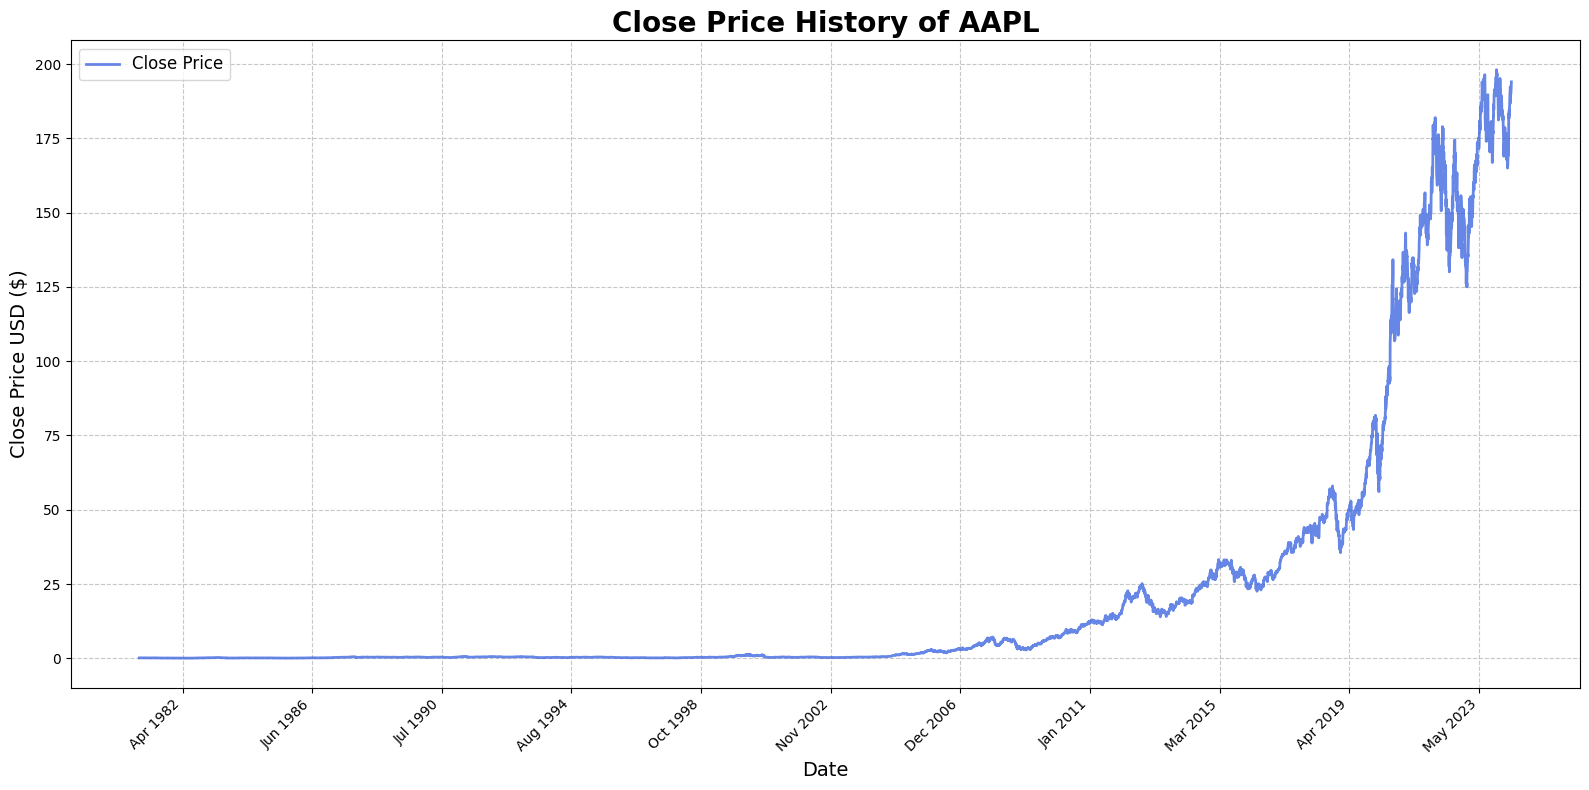

In [ ]:
import matplotlib.dates as mdates #imported the matplotlib.dates as mdates for formating the dates in plots
from matplotlib.ticker import MaxNLocator #imported the max nlocators from matplotlib.ticker for controling the ticker and there position.

# Plot the line plot of the 'Close' attribute
mtpl.figure(figsize=(16, 8))

# Plot with enhanced style and a label for the legend
mtpl.plot(aaplData.index, aaplData['Close'], color='royalblue', linestyle='-', linewidth=2, markersize=4, alpha=0.8, label='Close Price')

# Adding title and labels
mtpl.title('Close Price History of AAPL', fontsize=20, weight='bold') #setted up the title of the plot
mtpl.xlabel('Date', fontsize=14) #setted up the x label of the plot
mtpl.ylabel('Close Price USD ($)', fontsize=14) #setted up the y label of the plot

#Adding grid for the better readability
mtpl.grid(True, linestyle='--', alpha=0.7) #setted up the grid for the better readability

#Adding a legend
mtpl.legend(fontsize=12)

# Date formatting for x-axis
ax = mtpl.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))  # Limit the number of ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format dates as Month Year

# Rotate date labels to prevent overlap
mtpl.xticks(rotation=45, ha='right')

# Adjust layout
mtpl.tight_layout()

# Show the plot
mtpl.show()

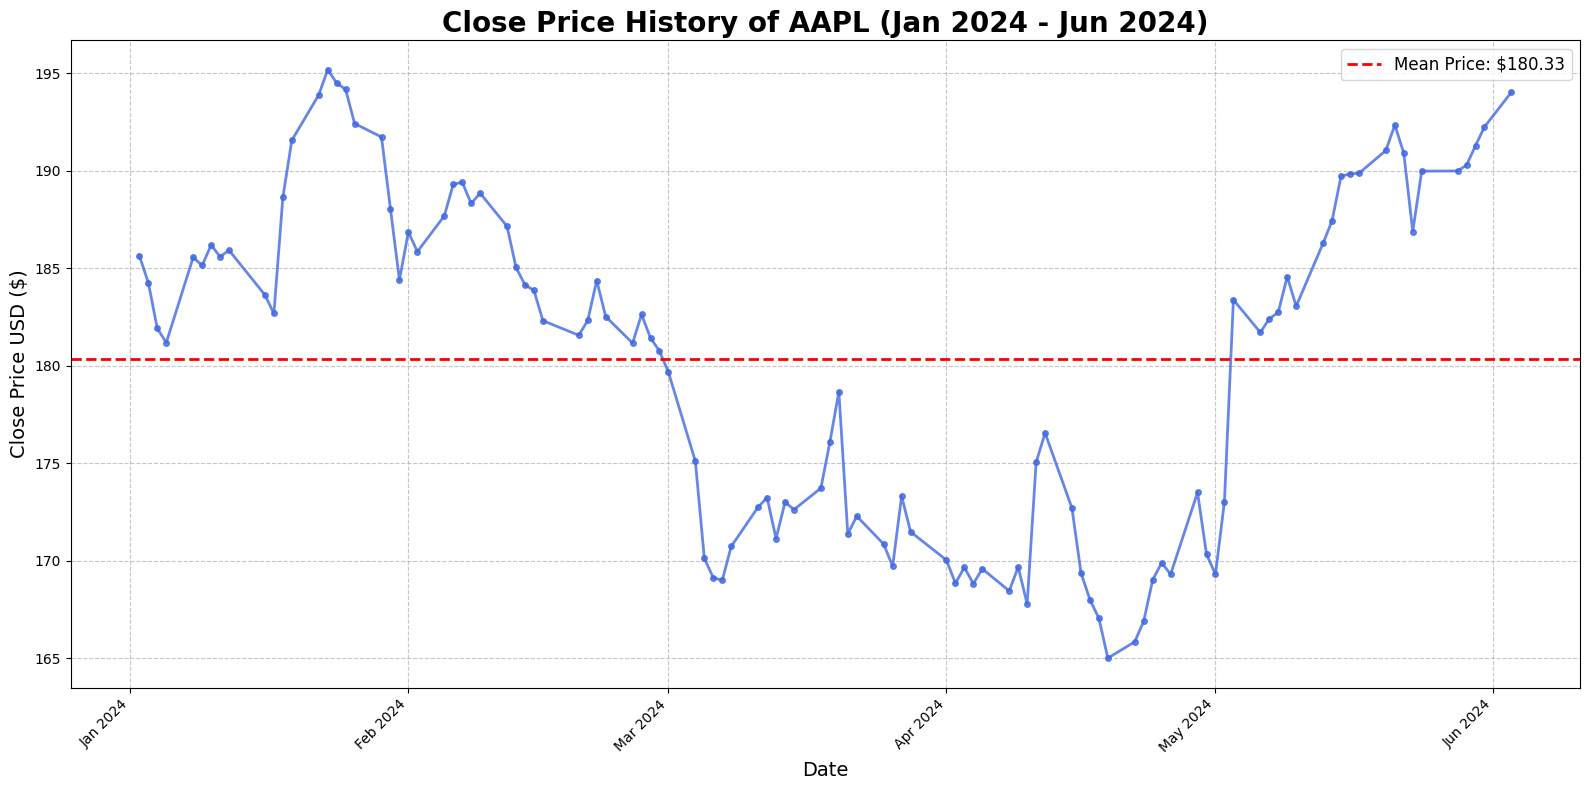

In [ ]:
# Filter the aaplData for a specific range (e.g., first half of the year 2024)
start_date = '2024-01-01'
end_date = '2024-06-30'
filtered_aaplData = aaplData.loc[start_date:end_date]

# Plot the line plot of the 'Close' attribute
mtpl.figure(figsize=(16, 8))

# Plot with enhanced style
mtpl.plot(filtered_aaplData.index, filtered_aaplData['Close'], color='royalblue', linestyle='-', linewidth=2, marker='o', markersize=4, alpha=0.8)

#Adding title and labels
mtpl.title(f'Close Price History of AAPL (Jan 2024 - Jun 2024)', fontsize=20, weight='bold') #setted up the title of the plot
mtpl.xlabel('Date', fontsize=14) #setted up the x label of the plot
mtpl.ylabel('Close Price USD ($)', fontsize=14) #setted up the y label of the plot

#Adding grid for teh better readability
mtpl.grid(True, linestyle='--', alpha=0.7)

# Adding a vertical line for the mean price
mean_price = filtered_aaplData['Close'].mean()
mtpl.axhline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean Price: ${mean_price:.2f}')

# Adding a legend
mtpl.legend(fontsize=12)

# Date formatting for x-axis
ax = mtpl.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  #Show one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  #Format dates as Month Year

# Rotate date labels to prevent overlap
mtpl.xticks(rotation=45, ha='right')

# Adjust layout
mtpl.tight_layout()

# Show the plot
mtpl.show()

In [ ]:
import plotly.express as px

# Plotly Histogram
fggp = px.histogram(aaplData, x='Close',
                   nbins=50,
                   title='Histogram of Closing Prices',
                   labels={'Close': 'Price'},
                   color_discrete_sequence=['#1f77b4'])

# Adding a line for the meanMO
fggp.add_vline(x=aaplData['Close'].mean(), line_dash="dash", line_color="red", annotation_text=f"Mean: {aaplData['Close'].mean():.2f}")

# Updating the layout for better aesthetics
fggp.update_layout(
    title=dict(font=dict(size=24, color='darkblue'), x=0.5),
    xaxis_title=dict(font=dict(size=18)),
    yaxis_title=dict(font=dict(size=18)),
    template='plotly_white',
    bargap=0.2
)

fggp.show()

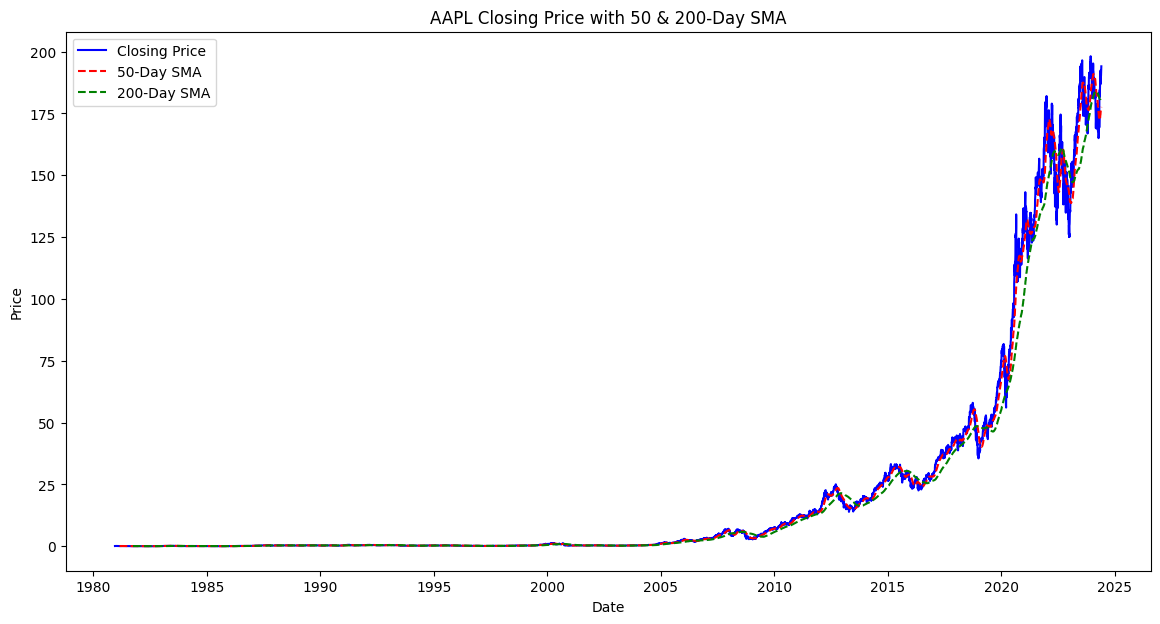

In [ ]:
# Calculate moving averages
aaplData['SMA_50'] = aaplData['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
aaplData['SMA_200'] = aaplData['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average

# Plotting closing price with moving averages
mtpl.figure(figsize=(14, 7))
mtpl.plot(aaplData['Close'], label='Closing Price', color='blue')
mtpl.plot(aaplData['SMA_50'], label='50-Day SMA', color='red', linestyle='--')
mtpl.plot(aaplData['SMA_200'], label='200-Day SMA', color='green', linestyle='--')
mtpl.title(f'AAPL Closing Price with 50 & 200-Day SMA')
mtpl.xlabel('Date')
mtpl.ylabel('Price')
mtpl.legend()
mtpl.show()

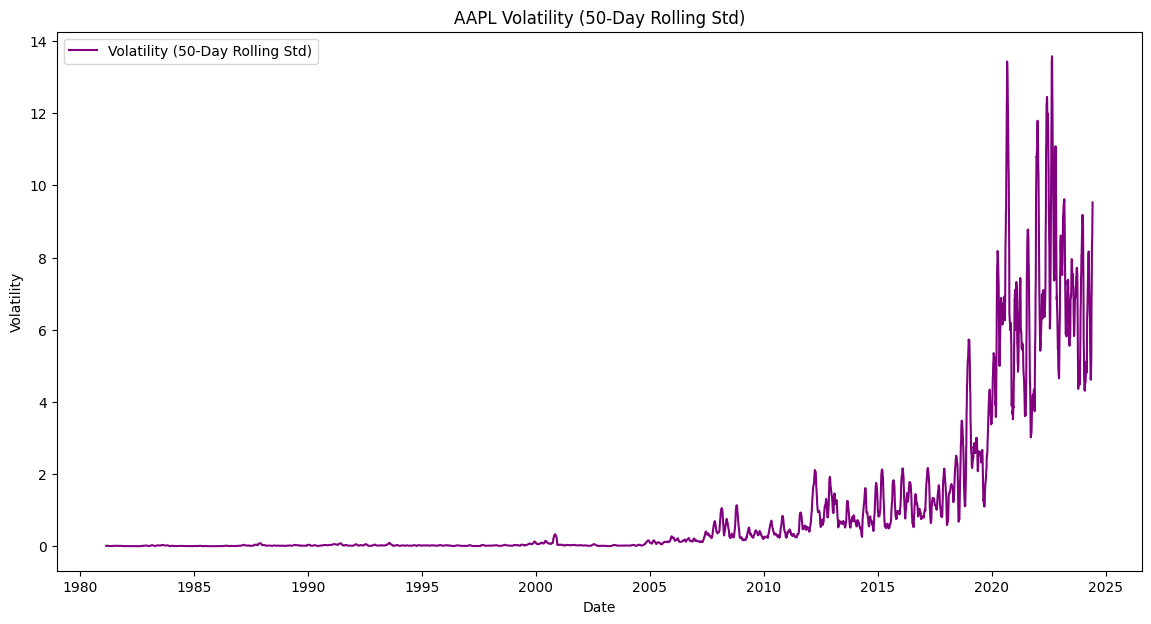

In [ ]:
# Calculate the rolling standard deviation (volatility)
aaplData['Volatility'] = aaplData['Close'].rolling(window=50).std()

# Plotting volatility
mtpl.figure(figsize=(14, 7))
mtpl.plot(aaplData['Volatility'], label='Volatility (50-Day Rolling Std)', color='purple')
mtpl.title(f'AAPL Volatility (50-Day Rolling Std)')
mtpl.xlabel('Date')
mtpl.ylabel('Volatility')
mtpl.legend()
mtpl.show()

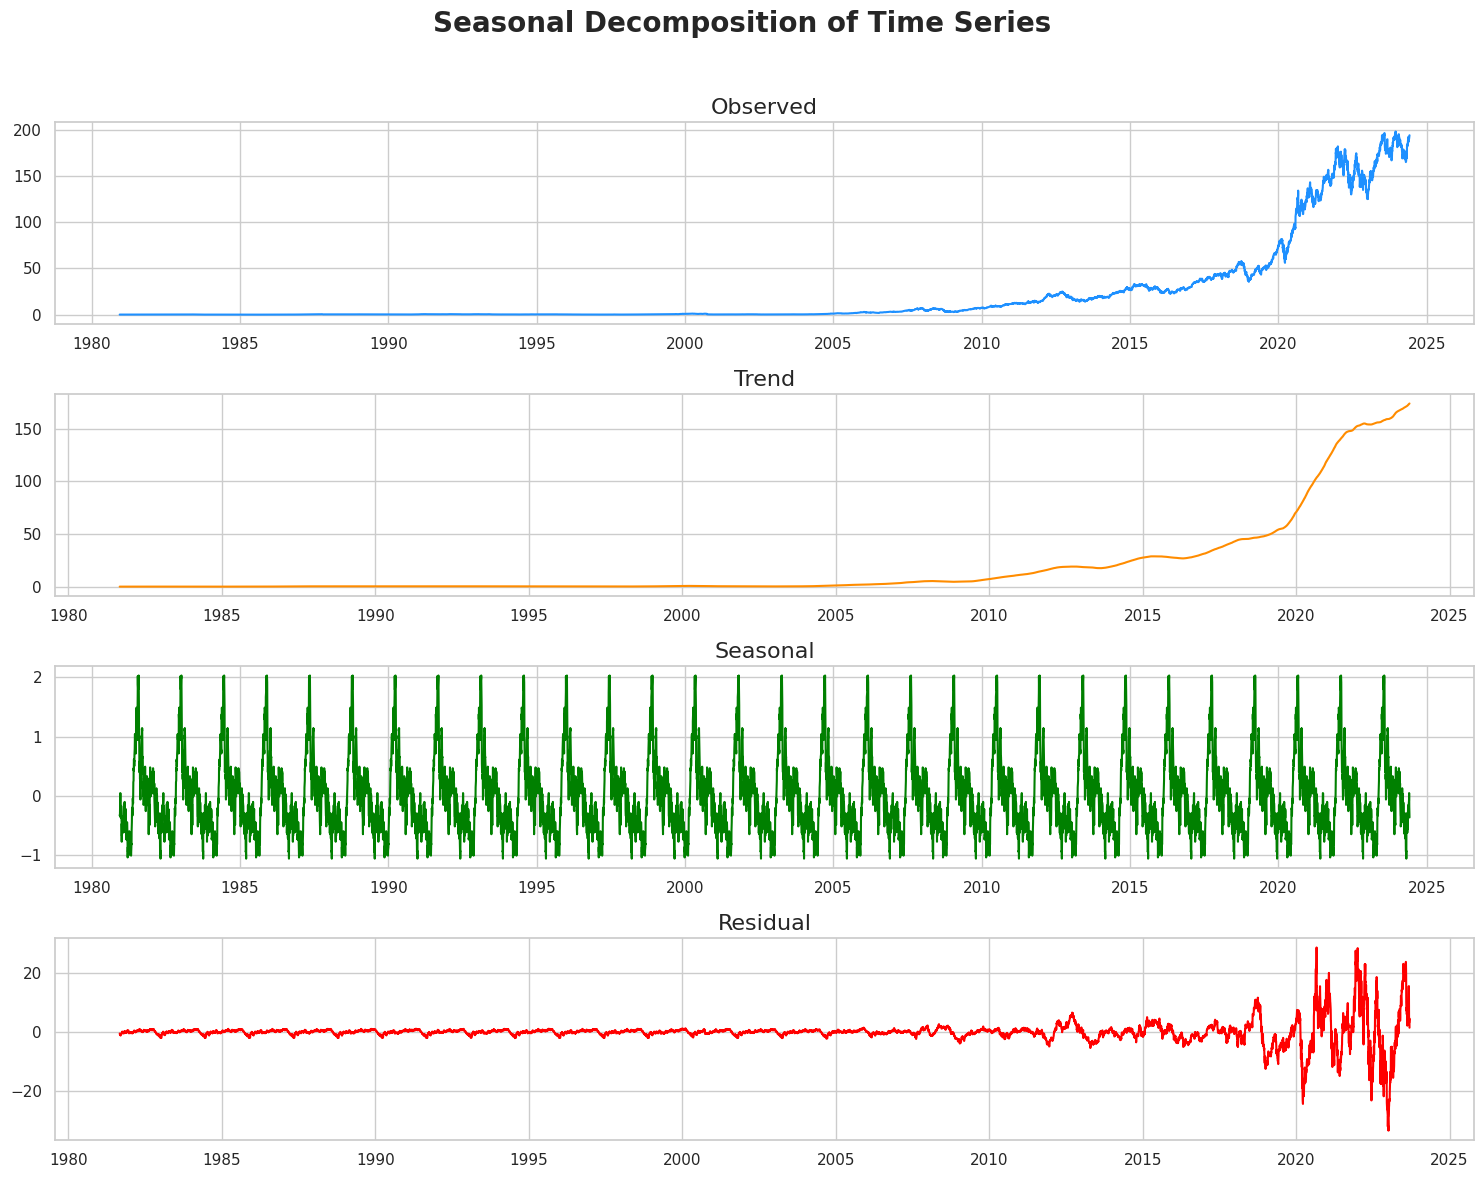

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #imported the seasonal decompose forseasonality plot

#Decompose the time series
decomposition = seasonal_decompose(aaplData['Close'], model='additive', period=365)

# Set up the Seaborn style and color palette
sens.set(style="whitegrid")

# Create a figure with a customized size and layout
fggp, (ax1, ax2, ax3, ax4) = mtpl.subplots(4, 1, figsize=(15, 12))
fggp.suptitle('Seasonal Decomposition of Time Series', fontsize=20, fontweight='bold')

# Plot the observed aaplData
ax1.plot(decomposition.observed, color='dodgerblue')
ax1.set_title('Observed', fontsize=16)
ax1.grid(True)

# Plot the trend component
ax2.plot(decomposition.trend, color='darkorange')
ax2.set_title('Trend', fontsize=16)
ax2.grid(True)

# Plot the seasonal component
ax3.plot(decomposition.seasonal, color='green')
ax3.set_title('Seasonal', fontsize=16)
ax3.grid(True)

# Plot the residual component
ax4.plot(decomposition.resid, color='red')
ax4.set_title('Residual', fontsize=16)
ax4.grid(True)

# Improve layout
mtpl.tight_layout(rect=[0, 0, 1, 0.96])
mtpl.show()

In [ ]:
aaplData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10959 entries, 1980-12-12 to 2024-06-03
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        10959 non-null  float64
 1   High        10959 non-null  float64
 2   Low         10959 non-null  float64
 3   Close       10959 non-null  float64
 4   Adj Close   10959 non-null  float64
 5   Volume      10959 non-null  int64  
 6   SMA_50      10910 non-null  float64
 7   SMA_200     10760 non-null  float64
 8   Volatility  10910 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


In [ ]:
import plotly.graph_objects as go

# Filter data for the year 2024
aaplData_2024 = aaplData[aaplData.index.year == 2024]

# Creating a candlestick chart for the year 2024
fggp = go.Figure(data=[go.Candlestick(x=aaplData_2024.index,
                                     open=aaplData_2024['Open'],
                                     high=aaplData_2024['High'],
                                     low=aaplData_2024['Low'],
                                     close=aaplData_2024['Close'])])

fggp.update_layout(title=f'AAPL Candlestick Chart for 2024',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fggp.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler #importred the minmaxscaler for normalizing the dataset.

minscl = MinMaxScaler(feature_range=(0, 1))
scaledAaplData = minscl.fit_transform(aaplData[['Close']])

#Create sequences
def CreateSequences(aaplData, SeqLength):
    xss, yss = [], []
    for a in range(len(aaplData) - SeqLength):
        m = aaplData[a:a + SeqLength]
        n = aaplData[a + SeqLength]
        xss.append(m)
        yss.append(n)
    return npm.array(xss), npm.array(yss)

SeqLen = 10
Xfeature, ytarget = CreateSequences(scaledAaplData, SeqLen)

#Spliting data into the training and the testing sets
SplitIdx = int(len(Xfeature) * 0.8)
XtrainData, XtestData = Xfeature[:SplitIdx], Xfeature[SplitIdx:]
ytrainData, ytestData = ytarget[:SplitIdx], ytarget[SplitIdx:]

In [ ]:
Xfeature.shape

(10949, 10, 1)

##**LSTM Model**

In [ ]:
import tensorflow as tf #imorted the tensorlow as tf for buldinng the deep learning models
from tensorflow.keras.models import Sequential #imported the Sequential class, used to create the linear stack of layers for the model.
from tensorflow.keras.layers import LSTM, Dense, Dropout #imported the LSTM, Dense, Dropout layers for the model.
from tensorflow.keras.optimizers import Adam #imported the Adam optimizer for the model.

#Define the model
mdl = Sequential()

#Single LSTM layer with Dropout
mdl.add(LSTM(units=50, input_shape=(SeqLen, 1)))
mdl.add(Dropout(0.3))  # Dropout rate of 30%

#Output layer
mdl.add(Dense(units=1))

#Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.03)
mdl.compile(optimizer=optimizer, loss='mean_squared_error')

#Summary of the model
mdl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
hstory = mdl.fit(XtrainData, ytrainData, epochs=10, batch_size=256, validation_split=0.1)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0139 - val_loss: 0.0083
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6634e-04 - val_loss: 0.0038
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1097e-04 - val_loss: 2.4325e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3906e-05 - val_loss: 8.8681e-06
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3166e-05 - val_loss: 2.3898e-05
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4640e-05 - val_loss: 8.7773e-06
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2298e-05 - val_loss: 9.5773e-06
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0819e-06 - val_loss: 9.4183e-06
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6010e-06 - val_loss: 1.0267e-05
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5608e-06 - val_loss: 8.7264e-06


In [ ]:
# Evaluate the model
yprd = mdl.predict(XtestData)

ytestData_inv_lstm = minscl.inverse_transform(ytestData)
yprd_inv_lstm = minscl.inverse_transform(yprd)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score

def evaluate_forecast(ytrue, yprd):
    #Calculate the Mean Squared Error (MSE)
    msescore = mean_squared_error(ytrue, yprd)

    #Calculate the Root Mean Squared Error (RMSE)
    rmsescore = mean_squared_error(ytrue, yprd, squared=False)

    #Calculate the Mean Absolute Error (MAE)
    maescore = mean_absolute_error(ytrue, yprd)

    #Calculate the Mean Absolute Percentage Error (MAPE)
    mapescore = mean_absolute_percentage_error(ytrue, yprd)

    #Calculate the R^2 Score (Coefficient of Determination)
    r2score = r2_score(ytrue, yprd)

    #Calculate the Explained Variance Score
    ExplainedVariance = explained_variance_score(ytrue, yprd)

    #Return the results as a dictionary
    return {
        'MSE': msescore,
        'RMSE': rmsescore,
        'MAE': maescore,
        'MAPE': mapescore,
        'R2 Score': r2score,
        'Explained Variance': ExplainedVariance
    }

# Example usage:
lstm_metrics = evaluate_forecast(ytestData_inv_lstm, yprd_inv_lstm)

In [ ]:
# Print the evaluation metrics
print('Mean Squared Error (MSE): ', lstm_metrics['MSE'])
print('Root Mean Squared Error (RMSE): ', lstm_metrics['RMSE'])
print('Mean Absolute Error (MAE): ', lstm_metrics['MAE'])
print('Mean Absolute Percentage Error (MAPE): ', lstm_metrics['MAPE'])
print('R2 Score: ', lstm_metrics['R2 Score'])
print('Explained Variance Score: ', lstm_metrics['Explained Variance'])

Mean Squared Error (MSE):  179.83690813625975
Root Mean Squared Error (RMSE):  13.410328412692202
Mean Absolute Error (MAE):  8.870337889888452
Mean Absolute Percentage Error (MAPE):  0.06447161694799128
R2 Score:  0.9467968877395017
Explained Variance Score:  0.9689676107072186


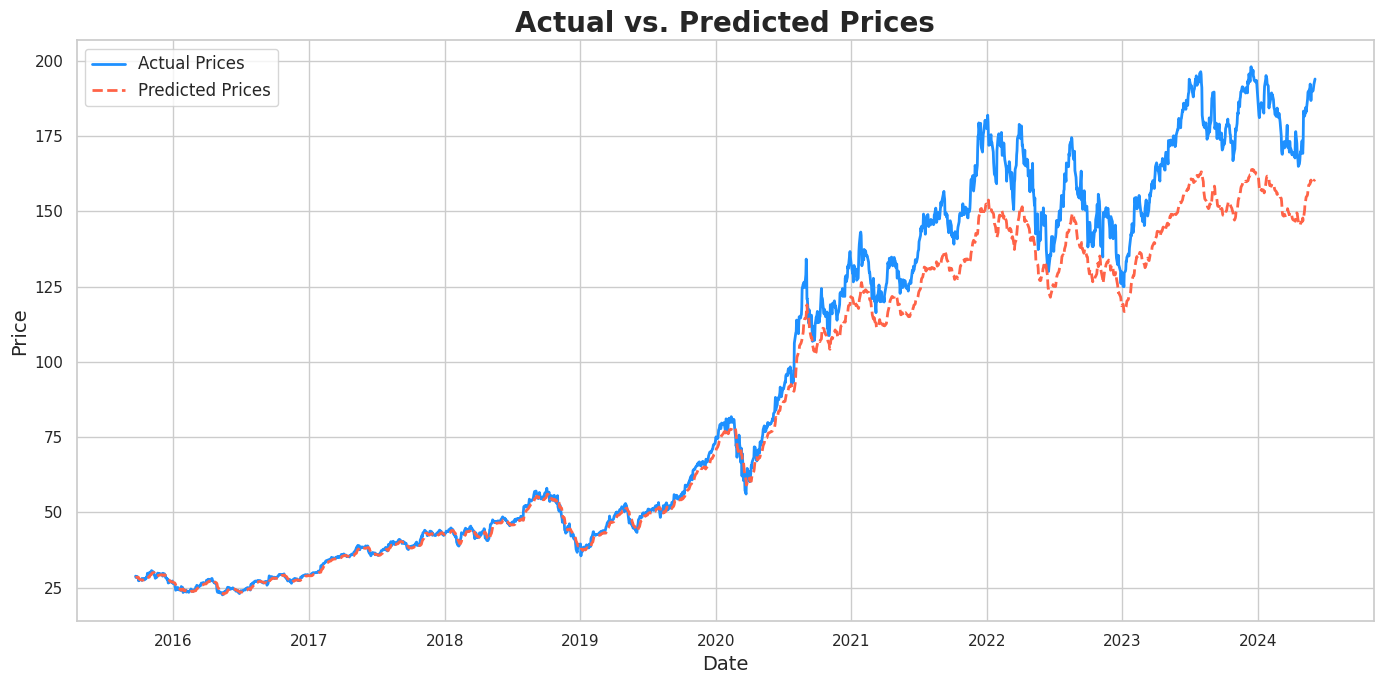

In [ ]:
def plot_actual_vs_predicted(dates, actual, predicted, title='Actual vs. Predicted Prices', xlabel='Date', ylabel='Price'):
    #Set up the Seaborn style
    sens.set(style="whitegrid")

    #Create the figure and axis
    mtpl.figure(figsize=(14, 7))

    #Plot the actual prices
    mtpl.plot(dates, actual, label='Actual Prices', color='dodgerblue', linewidth=2)

    #Plot the predicted prices
    mtpl.plot(dates, predicted, label='Predicted Prices', color='tomato', linestyle='--', linewidth=2)

    # Add title and labels with custom font sizes
    mtpl.title(title, fontsize=20, fontweight='bold')
    mtpl.xlabel(xlabel, fontsize=14)
    mtpl.ylabel(ylabel, fontsize=14)

    # Show legend with a custom location
    mtpl.legend(loc='upper left', fontsize=12)

    # Add grid for better readability
    mtpl.grid(True)

    # Tighten the layout
    mtpl.tight_layout()

    # Display the plot
    mtpl.show()

# Example usage:
plot_actual_vs_predicted(aaplData.index[-len(ytestData_inv_lstm):], ytestData_inv_lstm, yprd_inv_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

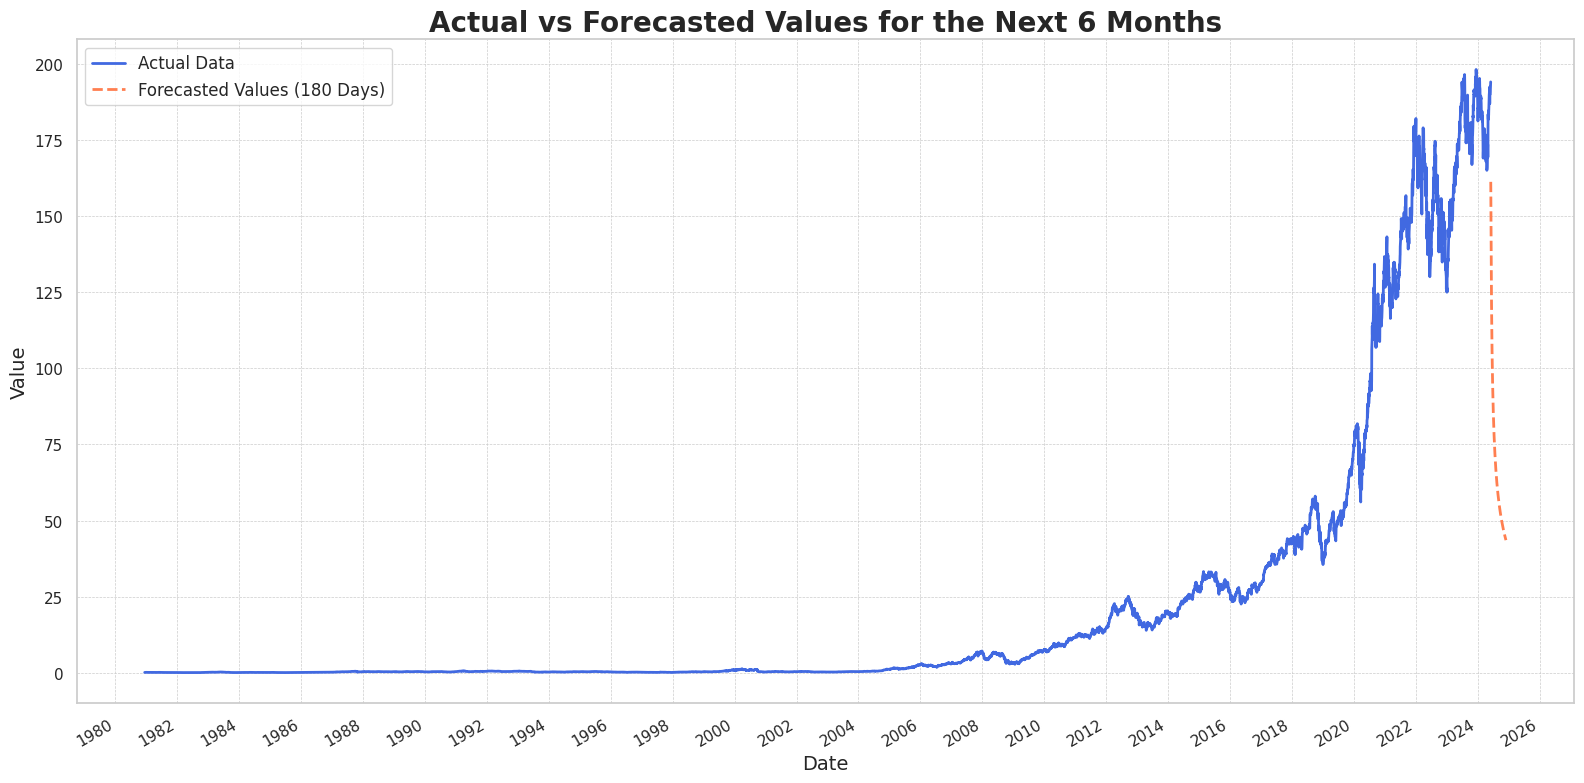

In [ ]:
import matplotlib.dates as mdates

def forecast_and_plot_from_last_data_point(mdl, last_sequence, n_steps, minscl, actual_data, SeqLen, date_index):
    def forecast(mdl, last_sequence, n_steps):
        forecasted_values = []
        current_sequence = last_sequence

        for _ in range(n_steps):
            # Reshape the current sequence to match the model's input shape
            current_sequence_reshaped = current_sequence.reshape((1, SeqLen, 1))

            # Predict the next value
            next_value = mdl.predict(current_sequence_reshaped)

            # Append the predicted value to the forecasted values
            forecasted_values.append(next_value[0, 0])

            #Update the current sequence by removing the first value and adding the predicted value
            current_sequence = npm.append(current_sequence[1:], next_value)

        return npm.array(forecasted_values)

    # Perform forecasting
    forecasted_values = forecast(mdl, last_sequence, n_steps)

    # Rescale the forecasted values back to the original scale
    forecasted_values_rescaled = minscl.inverse_transform(forecasted_values.reshape(-1, 1))

    # Set up Seaborn style
    sens.set(style="whitegrid")

    # Create the full date range
    forecast_dates = pd.date_range(start=date_index[-1] + pd.Timedelta(days=1), periods=n_steps, freq='D')

    # Plot the actual data and forecasted values
    mtpl.figure(figsize=(16, 8))
    mtpl.plot(date_index, actual_data, label='Actual Data', color='royalblue', linewidth=2)
    mtpl.plot(forecast_dates, forecasted_values_rescaled, label=f'Forecasted Values ({n_steps} Days)',
             color='coral', linewidth=2, linestyle='--')

    # Title and labels with custom font sizes
    mtpl.title(f'Actual vs Forecasted Values for the Next 6 Months', fontsize=20, fontweight='bold')
    mtpl.xlabel('Date', fontsize=14)
    mtpl.ylabel('Value', fontsize=14)

    # Format x-axis to display a range of two years
    mtpl.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only the year
    mtpl.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))  # Place major ticks every 2 years
    mtpl.gcf().autofmt_xdate()  # Rotate date labels for better readability

    # Show legend with a custom location and font size
    mtpl.legend(loc='upper left', fontsize=12)

    # Add grid for better readability
    mtpl.grid(True, linestyle='--', linewidth=0.5)

    # Enhance layout
    mtpl.tight_layout()

    # Display the plot
    mtpl.show()

    return forecasted_values_rescaled

# Example of how to use the method
last_sequence = scaledAaplData[-SeqLen:]  # Get the last sequence of data
n_days = 180  # Forecast for the next 365 days
actual_data = minscl.inverse_transform(scaledAaplData)  # The actual data in original scale
date_index = aaplData.index  # Use the date index from the original DataFrame

# Call the function to plot actual vs forecasted with reduced x-axis year labels
forecasted_values_rescaled = forecast_and_plot_from_last_data_point(mdl, last_sequence, n_days, minscl, actual_data, SeqLen, date_index)

##**GRU Model**

In [ ]:
from tensorflow.keras.layers import GRU

# Define the model
gru_mdl = Sequential()

# Single GRU layer with Dropout
gru_mdl.add(GRU(units=50, input_shape=(10, 1)))
gru_mdl.add(Dropout(0.4))  # Dropout rate of 30%

# Output layer
gru_mdl.add(Dense(units=1))

# Compile the model with a custom learning rate
learning_rate = 0.06
optimizer = Adam(learning_rate=learning_rate)
gru_mdl.compile(optimizer=optimizer, loss='mean_squared_error')

# Summary of the model
gru_mdl.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
hstory = gru_mdl.fit(XtrainData, ytrainData, epochs=10, batch_size=256, validation_split=0.1)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1084 - val_loss: 0.0038
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1030e-04 - val_loss: 0.0033
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2335e-04 - val_loss: 2.1333e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8477e-04 - val_loss: 1.9982e-05
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1857e-04 - val_loss: 6.1247e-06
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2037e-05 - val_loss: 1.6196e-05
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7981e-05 - val_loss: 6.6811e-06
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7620e-05 - val_loss: 6.4668e-06
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8605e-05 - val_loss: 7.2422e-06
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3013e-05 - val_loss: 9.2701e-06


In [ ]:
# Make predictions
yprd = gru_mdl.predict(XtestData)

# Inverse transform the predictions and actual values
yprd_inv_gru = minscl.inverse_transform(yprd)
ytestData_inv_gru = minscl.inverse_transform(ytestData.reshape(-1, 1)).reshape(ytestData.shape)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
gru_metrics = evaluate_forecast(ytestData_inv_gru, yprd_inv_gru)

In [ ]:
print('Mean Squared Error (MSE): ', gru_metrics['MSE'])
print('Root Mean Squared Error (RMSE): ', gru_metrics['RMSE'])
print('Mean Absolute Error (MAE): ', gru_metrics['MAE'])
print('Mean Absolute Percentage Error (MAPE): ', gru_metrics['MAPE'])
print('R2 Score: ', gru_metrics['R2 Score'])
print('Explained Variance Score: ', gru_metrics['Explained Variance'])

Mean Squared Error (MSE):  262.5516025037413
Root Mean Squared Error (RMSE):  16.203444155602885
Mean Absolute Error (MAE):  10.797775340725387
Mean Absolute Percentage Error (MAPE):  0.07694988270665667
R2 Score:  0.9223264983426176
Explained Variance Score:  0.95448462952643


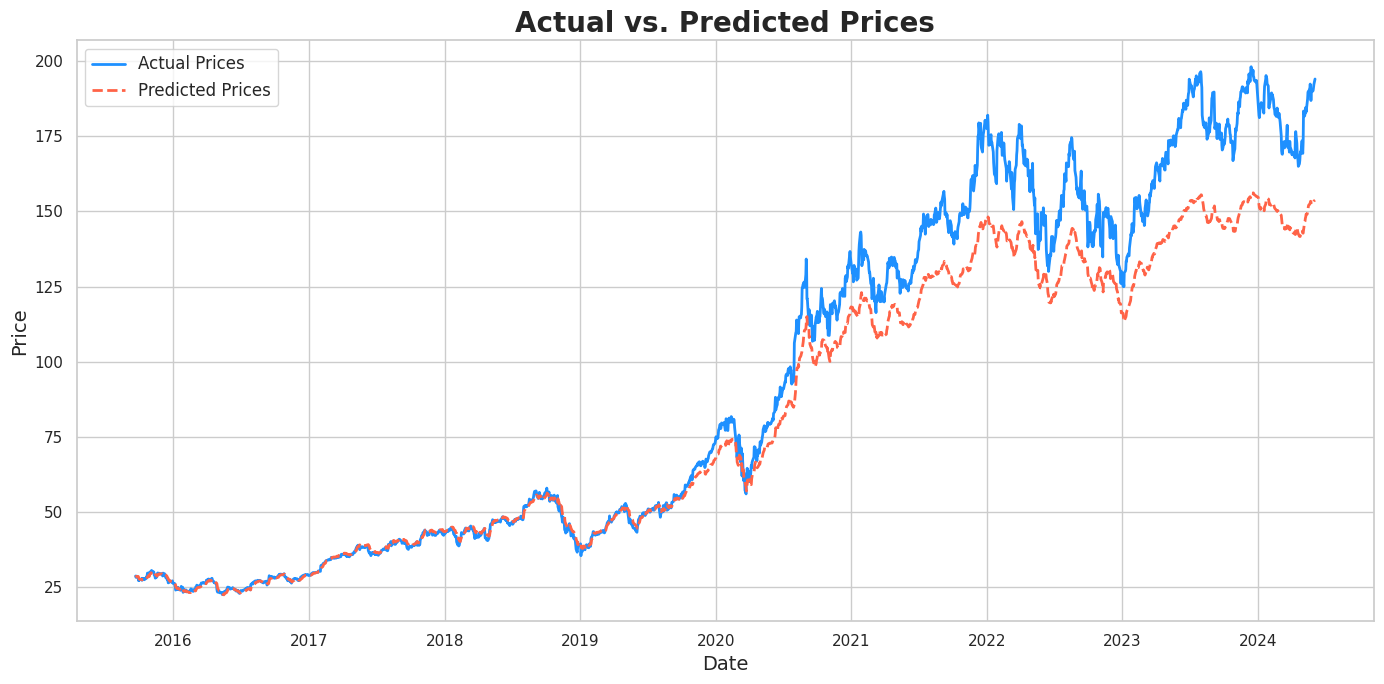

In [ ]:
plot_actual_vs_predicted(aaplData.index[-len(ytestData_inv_gru):], ytestData_inv_gru, yprd_inv_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

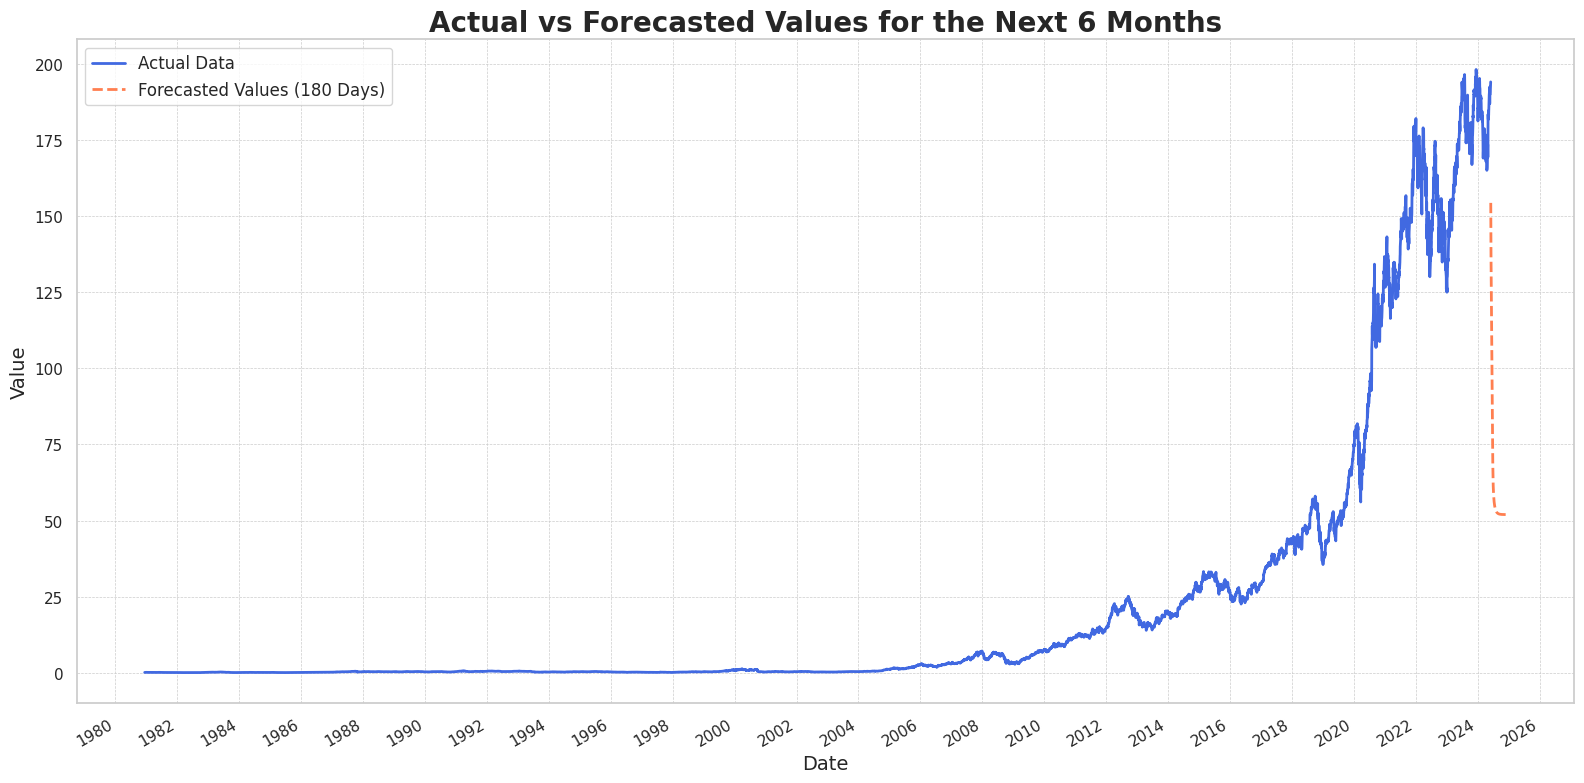

In [ ]:
forecasted_values_rescaled = forecast_and_plot_from_last_data_point(gru_mdl, last_sequence, n_days, minscl, actual_data, SeqLen,date_index)

##**Stacked LSTM Model**

In [ ]:
# Define the model
lstm_mdl = Sequential()
lstm_mdl.add(LSTM(50, return_sequences=True, input_shape=(10, 1)))
lstm_mdl.add(LSTM(50, return_sequences=True))
lstm_mdl.add(LSTM(50))
lstm_mdl.add(Dense(1))

# Compile the model
lstm_mdl.compile(optimizer='adam', loss='mean_squared_error')

lstm_mdl.summary()

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
hstory = lstm_mdl.fit(XtrainData, ytrainData, epochs=100, batch_size=256, validation_split=0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.0168e-04 - val_loss: 4.7618e-04
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2889e-06 - val_loss: 1.7998e-05
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3827e-07 - val_loss: 1.7447e-05
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1327e-07 - val_loss: 2.1775e-05
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7385e-07 - val_loss: 1.7709e-05
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9094e-07 - val_loss: 2.8560e-05
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2179e-07 - val_loss: 2.0013e-05
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7295e-07 - val_loss: 1.7125e-05
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3547e-07 - val_loss: 1.8563e-05
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7579e-07 - val_loss: 2.0189e-05
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7344e-

In [ ]:
# Make predictions
yprd = lstm_mdl.predict(XtestData)

# Inverse transform the predictions and actual values
yprd_inv_st_lstm = minscl.inverse_transform(yprd)
ytestData_inv_st_lstm = minscl.inverse_transform(ytestData.reshape(-1, 1)).reshape(ytestData.shape)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
st_lstm_metrics = evaluate_forecast(ytestData_inv_st_lstm, yprd_inv_st_lstm)

In [ ]:
print('Mean Squared Error (MSE): ', st_lstm_metrics['MSE'])
print('Root Mean Squared Error (RMSE): ', st_lstm_metrics['RMSE'])
print('Mean Absolute Error (MAE): ', st_lstm_metrics['MAE'])
print('Mean Absolute Percentage Error (MAPE): ', st_lstm_metrics['MAPE'])
print('R2 Score: ', st_lstm_metrics['R2 Score'])
print('Explained Variance Score: ', st_lstm_metrics['Explained Variance'])

Mean Squared Error (MSE):  37.94480652866537
Root Mean Squared Error (RMSE):  6.1599355945225085
Mean Absolute Error (MAE):  3.9937322047858252
Mean Absolute Percentage Error (MAPE):  0.03611078578975508
R2 Score:  0.9887743743908348
Explained Variance Score:  0.9910820993689278


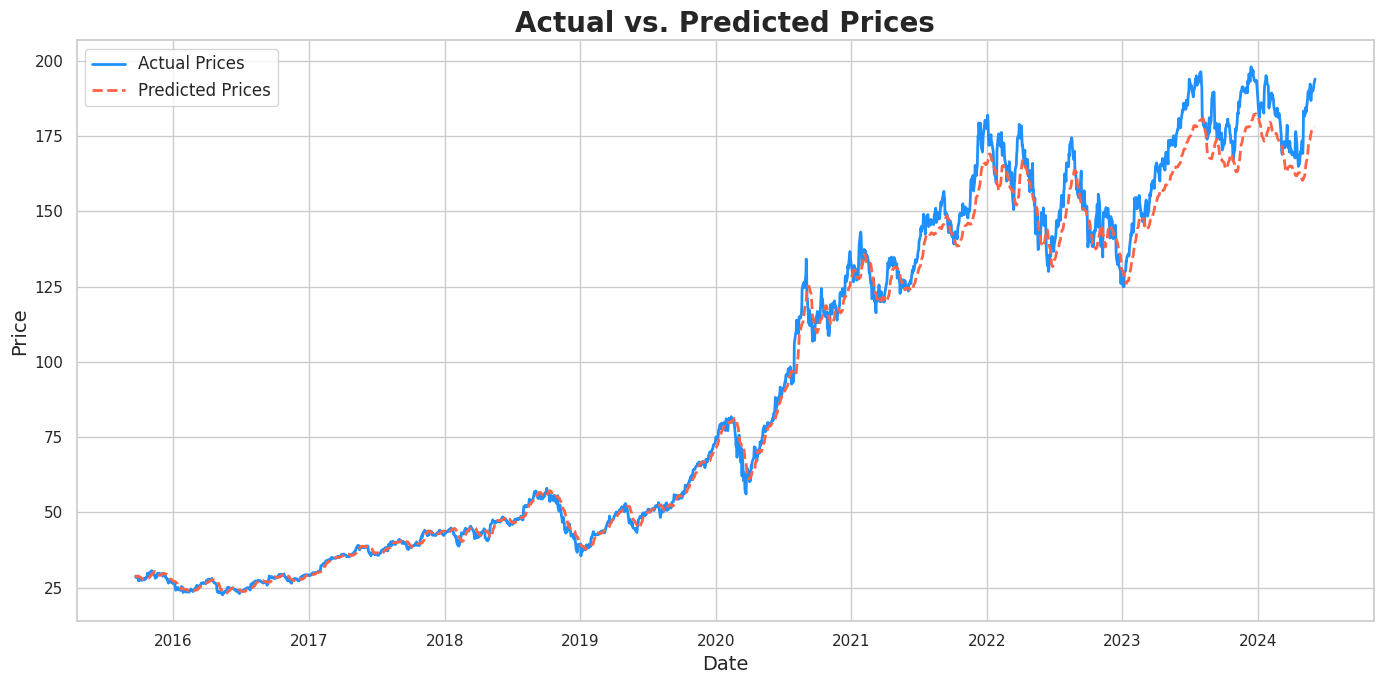

In [ ]:
plot_actual_vs_predicted(aaplData.index[-len(ytestData_inv_st_lstm):], ytestData_inv_st_lstm, yprd_inv_st_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

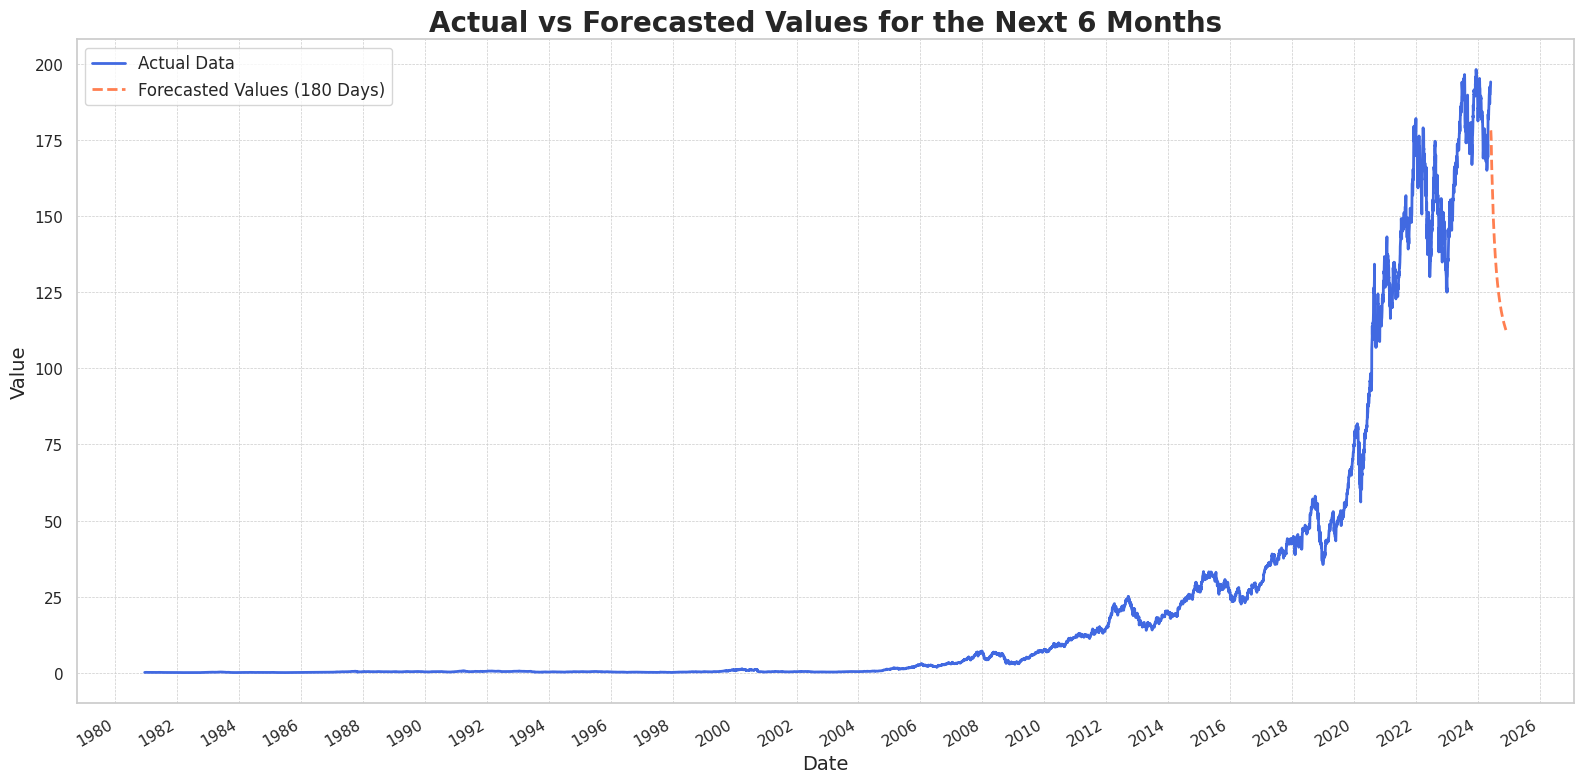

In [ ]:
forecasted_values_rescaled = forecast_and_plot_from_last_data_point(lstm_mdl, last_sequence, n_days, minscl, actual_data, SeqLen,date_index)

##**Stacked GRU Model**

In [ ]:
# Define the model
stacked_gru_mdl = Sequential()
stacked_gru_mdl.add(GRU(50, return_sequences=True, input_shape=(10, 1)))
stacked_gru_mdl.add(GRU(50, return_sequences=True))
stacked_gru_mdl.add(GRU(50))
stacked_gru_mdl.add(Dense(1))

# Compile the mdl
stacked_gru_mdl.compile(optimizer='adam', loss='mean_squared_error')

stacked_gru_mdl.summary()

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 10, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
hstory = stacked_gru_mdl.fit(XtrainData, ytrainData, epochs=100, batch_size=256, validation_split=0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.6995e-04 - val_loss: 2.6150e-05
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4511e-06 - val_loss: 2.3354e-05
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2059e-07 - val_loss: 1.2015e-05
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1288e-07 - val_loss: 1.0994e-05
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7906e-07 - val_loss: 1.0833e-05
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8674e-07 - val_loss: 1.1796e-05
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9954e-07 - val_loss: 1.1861e-05
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2713e-07 - val_loss: 1.0477e-05
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9095e-07 - val_loss: 1.3860e-05
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7171e-07 - val_loss: 1.1178e-05
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9852e-

In [ ]:
# Make predictions
yprd = stacked_gru_mdl.predict(XtestData)

# Inverse transform the predictions and actual values
yprd_inv_st_gru = minscl.inverse_transform(yprd)
ytestData_inv_st_gru = minscl.inverse_transform(ytestData.reshape(-1, 1)).reshape(ytestData.shape)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
st_gru_metrics = evaluate_forecast(ytestData_inv_st_gru, yprd_inv_st_gru)

In [ ]:
print('Mean Squared Error (MSE): ', st_gru_metrics['MSE'])
print('Root Mean Squared Error (RMSE): ', st_gru_metrics['RMSE'])
print('Mean Absolute Error (MAE): ', st_gru_metrics['MAE'])
print('Mean Absolute Percentage Error (MAPE): ', st_gru_metrics['MAPE'])
print('R2 Score: ', st_gru_metrics['R2 Score'])
print('Explained Variance Score: ', st_gru_metrics['Explained Variance'])

Mean Squared Error (MSE):  8.65947874588414
Root Mean Squared Error (RMSE):  2.94269922790015
Mean Absolute Error (MAE):  1.9083218705539648
Mean Absolute Percentage Error (MAPE):  0.018394649891490422
R2 Score:  0.997438172038158
Explained Variance Score:  0.997702919061814


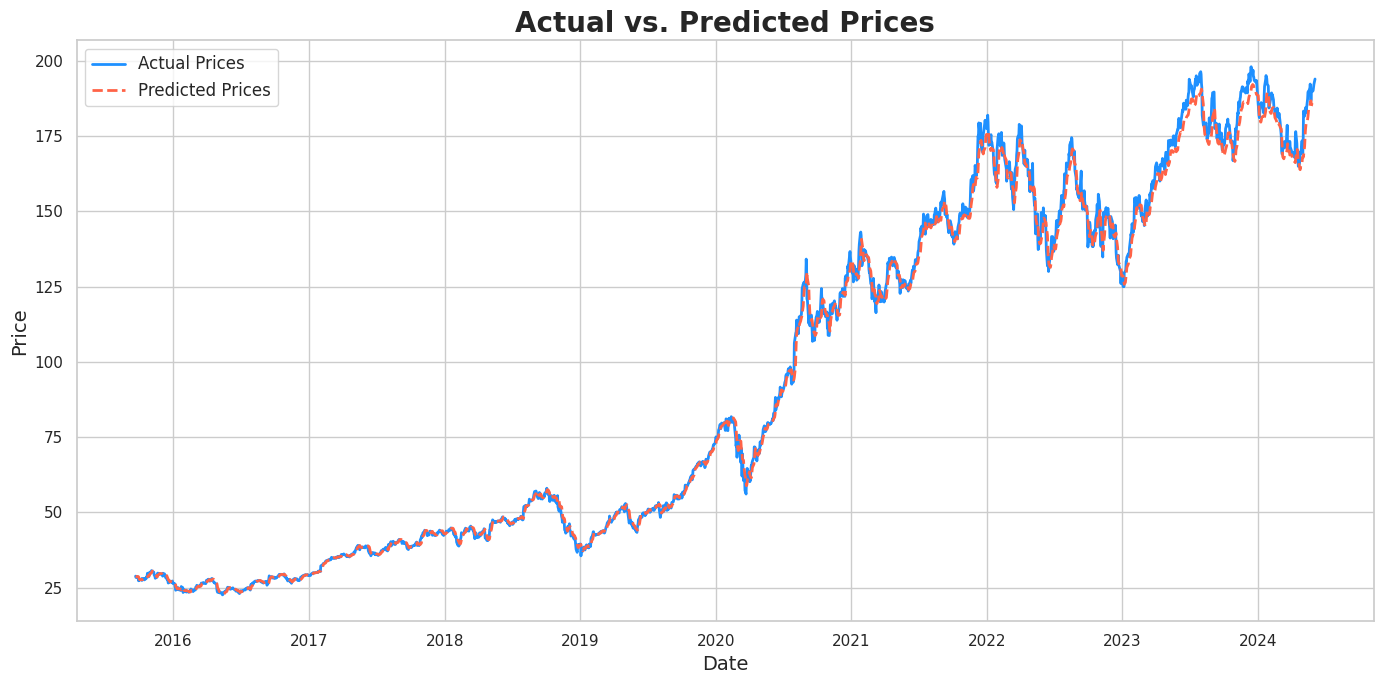

In [ ]:
plot_actual_vs_predicted(aaplData.index[-len(ytestData_inv_st_gru):], ytestData_inv_st_gru, yprd_inv_st_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

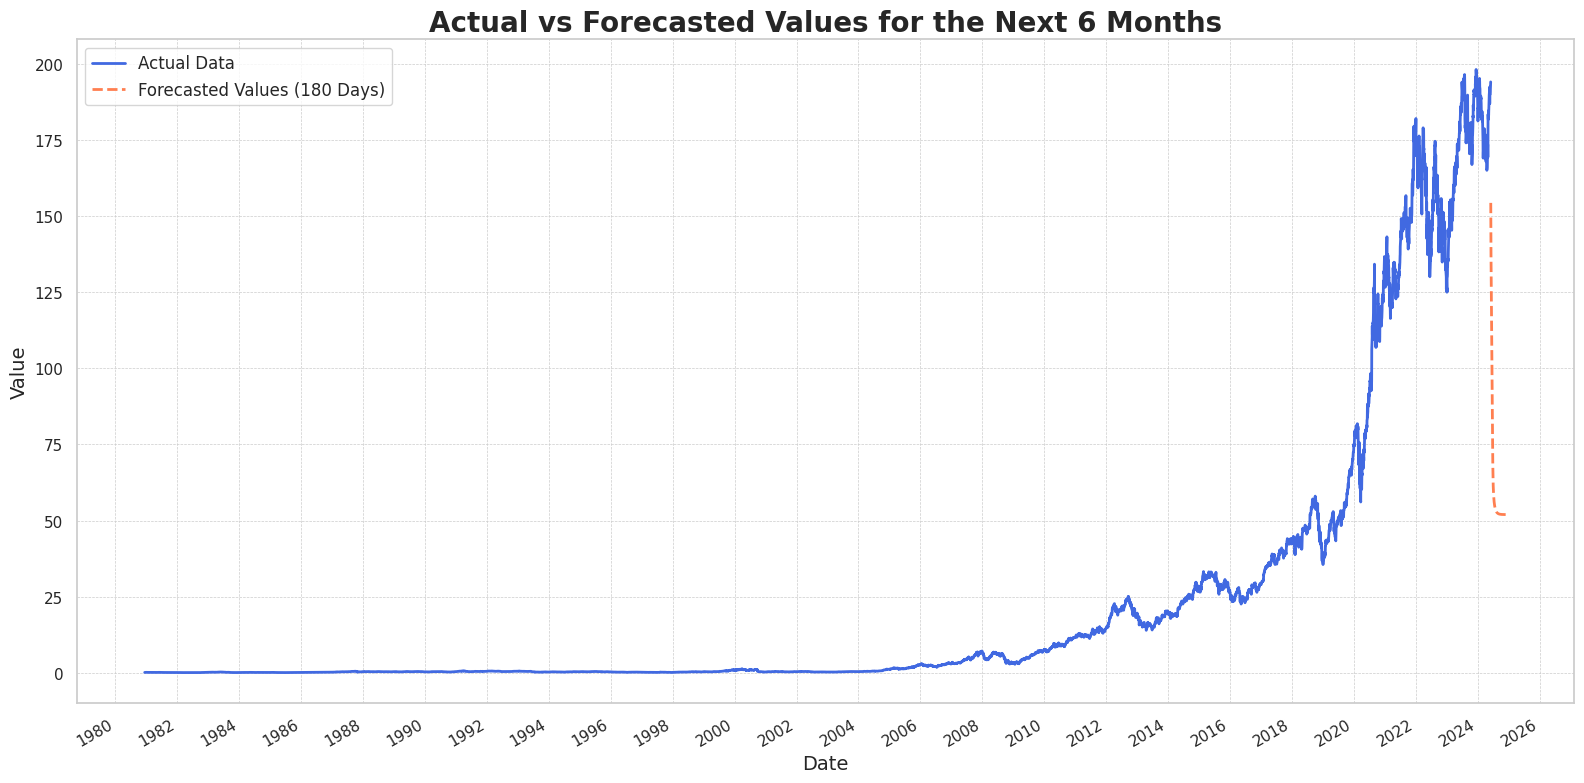

In [ ]:
forecasted_values_rescaled = forecast_and_plot_from_last_data_point(gru_mdl, last_sequence, n_days, minscl, actual_data, SeqLen, date_index)

In [ ]:
# Metrics for each model
metrics = {
    'Single LSTM': lstm_metrics,
    'Single GRU': gru_metrics,
    'Stacked LSTM': st_lstm_metrics,
    'Stacked GRU': st_gru_metrics
}

# Extract metric names (assuming all models have the same metrics)
metric_names = list(next(iter(metrics.values())).keys())
num_metrics = len(metric_names)
mdl_names = list(metrics.keys())

# Create an array to store metric values
metric_values = npm.array([[metrics[mdl][metric] for metric in metric_names] for mdl in mdl_names])

# Define colors for each metric (ensuring enough colors for all metrics)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Added more colors if needed

# Create the grouped bar chart
fggp = go.Figure()

for i, metric in enumerate(metric_names):
    fggp.add_trace(go.Bar(
        x=mdl_names,
        y=metric_values[:, i],
        name=metric,
        marker_color=colors[i % len(colors)],  # Wrap around if there are more metrics than colors
        text=[f'{val:.2f}' for val in metric_values[:, i]],
        textposition='outside',
        hoverinfo='x+y+text',
    ))

# Update layout
fggp.update_layout(
    title={
        'text': "Comparison of Evaluation Metrics for Different Models",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#333333', family='Arial Black')
    },
    xaxis=dict(
        title='Models',
        titlefont=dict(size=14, color='#333333'),
        tickfont=dict(size=12, color='#333333'),
        categoryorder='category ascending'
    ),
    yaxis=dict(
        title='Metric Values',
        titlefont=dict(size=14, color='#333333'),
        tickfont=dict(size=12, color='#333333'),
        gridcolor='rgba(171, 171, 171, 0.5)',
        zerolinecolor='rgba(171, 171, 171, 0.5)',
    ),
    barmode='group',
    bargap=0.15,  # Gap between bars of adjacent location coordinates.
    bargroupgap=0.1,  # Gap between bars of the same location coordinate.
    plot_bgcolor='white',
    legend=dict(
        title='Metrics',
        font=dict(size=12, color='#333333'),
        x=1,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(l=40, r=20, t=60, b=40),
)

# Display the plot
fggp.show()